In [0]:
! wget "http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
! ls

--2019-12-06 21:38:26--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  29.9MB/s    in 6.1s    

2019-12-06 21:38:32 (26.8 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-python.tar.gz	sample_data


In [0]:
! tar -xvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree        # For DecisionTreeClassifier class
import sklearn.ensemble    # For RandomForestClassifier class
import sklearn.datasets    # For make_circles
import sklearn.metrics     # For accuracy_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

In [0]:
x = np.zeros(3072)
y = np.array([], dtype= np.int)
for i in range(1,6):
  dicti = unpickle("cifar-10-batches-py/data_batch_"+str(i))
  x = np.row_stack( ( x, np.array(dicti[b'data'] , dtype= np.uint8) )  )
  y = np.append(  y, np.array( dicti[b'labels'], dtype= np.int32) , axis = 0 )
x = x[1:]

dicti = unpickle("cifar-10-batches-py/test_batch")

x_test = np.array(dicti[b'data'] , dtype= np.uint8)
y_test = np.array( dicti[b'labels'], dtype= np.int32)

In [0]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x_test = scaler.transform(x_test)

In [0]:
# pca = PCA()
# pca.fit_transform(x_train)
# print(len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.001]))


pca = PCA(n_components = 80)
pca.fit(x)
x = pca.transform(x)
x_test = pca.transform(x_test)

(50000, 80) (50000,)


[Text(167.4, 199.32, 'X[1] <= -9.903\ngini = 0.9\nsamples = 50000\nvalue = [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000\n5000]'),
 Text(83.7, 163.07999999999998, 'X[2] <= 0.815\ngini = 0.864\nsamples = 14387\nvalue = [1479, 2197, 787, 817, 721, 635, 730, 1192, 2736\n3093]'),
 Text(41.85, 126.83999999999999, 'X[7] <= 4.417\ngini = 0.862\nsamples = 7535\nvalue = [538, 1069, 489, 557, 469, 341, 480, 865, 730, 1997]'),
 Text(20.925, 90.6, 'X[0] <= -7.843\ngini = 0.882\nsamples = 5331\nvalue = [460, 620, 415, 402, 403, 257, 390, 655, 616, 1113]'),
 Text(10.4625, 54.359999999999985, 'X[1] <= -20.002\ngini = 0.889\nsamples = 2004\nvalue = [110, 288, 231, 234, 212, 128, 270, 179, 95, 257]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.87\nsamples = 716\nvalue = [43, 153, 49, 90, 38, 43, 45, 65, 53, 137]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.883\nsamples = 1288\nvalue = [67, 135, 182, 144, 174, 85, 225, 114, 42, 120]'),
 Text(31.387500000000003, 54.359999999999985

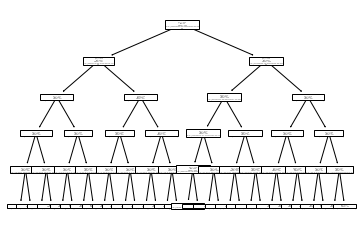

In [0]:
print(x.shape, y.shape)

tree = sklearn.tree.DecisionTreeClassifier(random_state=0, max_depth = 5)
tree.fit(x, y)
sklearn.tree.plot_tree(tree, max_depth = 5)

In [0]:

tree.score(x_test, y_test)


0.2615